In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, r2_score, mean_squared_error

In [2]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic',
 'anagrams',
 'anagrams',
 'anscombe',
 'anscombe',
 'attention',
 'attention',
 'brain_networks',
 'brain_networks',
 'car_crashes',
 'car_crashes',
 'diamonds',
 'diamonds',
 'dots',
 'dots',
 'dowjones',
 'dowjones',
 'exercise',
 'exercise',
 'flights',
 'flights',
 'fmri',
 'fmri',
 'geyser',
 'geyser',
 'glue',
 'glue',
 'healthexp',
 'healthexp',
 'iris',
 'iris',
 'mpg',
 'mpg',
 'penguins',
 'penguins',
 'planets',
 'planets',
 'seaice',
 'seaice',
 'taxis',
 'taxis',
 'tips',
 'tips',
 'titanic',
 'titanic',
 'anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'plan

In [3]:
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
# Basic information of dataframe
print("The shape of the dataframe : {}".format(df.shape))
print()

print("The data types of the dataframe: {}".format(df.dtypes))
print()

print("The information of the dataframe : {}".format(df.info()))
print()

print("The description of the dataframe : {}".format(df.describe().transpose()))
print()

The shape of the dataframe : (150, 5)

The data types of the dataframe: sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
The information of the dataframe : None

The description of the dataframe :               count      mean       std  min  25%   50%  75%  max
sepal_length  150.0  5.843333  0.828066  4.3  5.1  5.80  6.4  7.9
sepal_width   150.0  3.057333  0.435866  2.0  2.8  3.00  3.3  4.4
petal_length  150.0  3.758000  1.765298  1.0  1.6  4.35  5.1  

In [5]:
print("The number of missing values in the dataframe : {}".format(df.isnull().sum()))
print()

df[df.isnull().any(axis=1)]

The number of missing values in the dataframe : sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64



,sepal_length,sepal_width,petal_length,petal_width,species


In [6]:
df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [7]:
df["species"].drop_duplicates()

0          setosa
50     versicolor
100     virginica
Name: species, dtype: object

In [8]:
df['species'] = df['species'].astype('category')
df.dtypes

sepal_length     float64
sepal_width      float64
petal_length     float64
petal_width      float64
species         category
dtype: object

In [9]:
df1 = df[df["species"] == "setosa"]
df1.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,50.00000,50.000000,50.000000,50.000000
mean,5.00600,3.428000,1.462000,0.246000
std,0.35249,0.379064,0.173664,0.105386
min,4.30000,2.300000,1.000000,0.100000
25%,4.80000,3.200000,1.400000,0.200000
50%,5.00000,3.400000,1.500000,0.200000
75%,5.20000,3.675000,1.575000,0.300000
max,5.80000,4.400000,1.900000,0.600000


In [10]:
df2 = df[df["species"] == "versicolor"]
df2.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,50.000000,50.000000,50.000000,50.000000
mean,5.936000,2.770000,4.260000,1.326000
std,0.516171,0.313798,0.469911,0.197753
min,4.900000,2.000000,3.000000,1.000000
25%,5.600000,2.525000,4.000000,1.200000
50%,5.900000,2.800000,4.350000,1.300000
75%,6.300000,3.000000,4.600000,1.500000
max,7.000000,3.400000,5.100000,1.800000


In [11]:
df3 = df[df["species"] == "virginica"]
df3.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,50.00000,50.000000,50.000000,50.00000
mean,6.58800,2.974000,5.552000,2.02600
std,0.63588,0.322497,0.551895,0.27465
min,4.90000,2.200000,4.500000,1.40000
25%,6.22500,2.800000,5.100000,1.80000
50%,6.50000,3.000000,5.550000,2.00000
75%,6.90000,3.175000,5.875000,2.30000
max,7.90000,3.800000,6.900000,2.50000


In [12]:
analysis1 = df.groupby('species')['sepal_length'].describe()
analysis1

,count,mean,std,min,25%,50%,75%,max
species,,,,,,,,
setosa,50.0,5.006,0.352490,4.3,4.800,5.0,5.2,5.8
versicolor,50.0,5.936,0.516171,4.9,5.600,5.9,6.3,7.0
virginica,50.0,6.588,0.635880,4.9,6.225,6.5,6.9,7.9


In [13]:
analysis2 = df.groupby('species')['sepal_width'].describe()
analysis2

,count,mean,std,min,25%,50%,75%,max
species,,,,,,,,
setosa,50.0,3.428,0.379064,2.3,3.200,3.4,3.675,4.4
versicolor,50.0,2.770,0.313798,2.0,2.525,2.8,3.000,3.4
virginica,50.0,2.974,0.322497,2.2,2.800,3.0,3.175,3.8


In [14]:
analysis3 = df.groupby('species')['petal_length'].describe().transpose()
analysis3

species,setosa,versicolor,virginica
count,50.000000,50.000000,50.000000
mean,1.462000,4.260000,5.552000
std,0.173664,0.469911,0.551895
min,1.000000,3.000000,4.500000
25%,1.400000,4.000000,5.100000
50%,1.500000,4.350000,5.550000
75%,1.575000,4.600000,5.875000
max,1.900000,5.100000,6.900000


In [15]:
analysis4 = df.groupby('species')['petal_width'].describe().transpose()
analysis4

species,setosa,versicolor,virginica
count,50.000000,50.000000,50.00000
mean,0.246000,1.326000,2.02600
std,0.105386,0.197753,0.27465
min,0.100000,1.000000,1.40000
25%,0.200000,1.200000,1.80000
50%,0.200000,1.300000,2.00000
75%,0.300000,1.500000,2.30000
max,0.600000,1.800000,2.50000


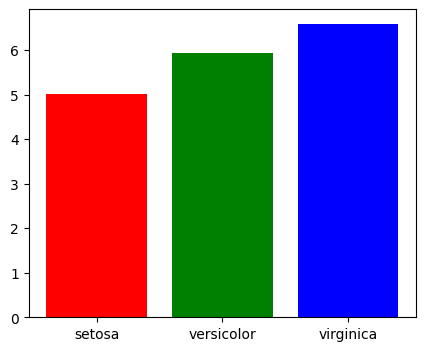

<BarContainer object of 3 artists>

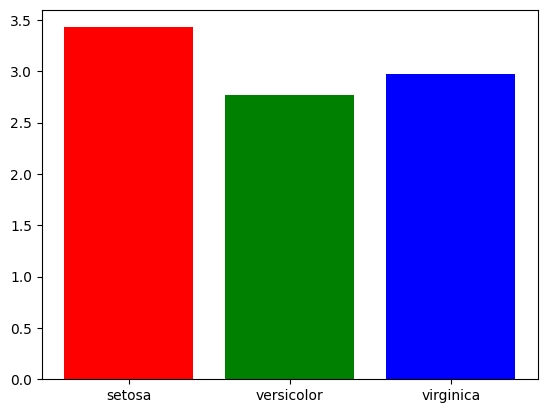

In [16]:
plt.figure(figsize=(5, 4))
plt.bar(["setosa", "versicolor", "virginica"], analysis1["mean"], color = ['red', 'green', 'blue'])
plt.show()
plt.bar(["setosa", "versicolor", "virginica"], analysis2["mean"], color = ['red', 'green', 'blue'])

A3 Part 2 on adult.csv

In [17]:
data = pd.read_csv("D:/PICT/TE/Subject_And_Study_Material/SEM_VI/Data_Science_And_Big_Data_Analytics_Lab(DSBDAL)/Datasets/A3/adult.csv")
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [18]:
data.shape

(32561, 15)

In [19]:
# Data types comes when invoking the info() method
# data.dtypes

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [21]:
data.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [22]:
data.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [23]:
cols = ['fnlwgt', 'education.num', 'relationship', 'capital.gain', 'capital.loss']

for col in cols:
    print(f"Unique values in {col} are: {data[col].unique()}")
    print()

Unique values in fnlwgt are: [ 77053 132870 186061 ...  34066  84661 257302]

Unique values in education.num are: [ 9 10  4  6 16 15 13 14  7 12 11  2  3  8  5  1]

Unique values in relationship are: ['Not-in-family' 'Unmarried' 'Own-child' 'Other-relative' 'Husband' 'Wife']

Unique values in capital.gain are: [    0 99999 41310 34095 27828 25236 25124 22040 20051 18481 15831 15024
 15020 14344 14084 13550 11678 10605 10566 10520  9562  9386  8614  7978
  7896  7688  7443  7430  7298  6849  6767  6723  6514  6497  6418  6360
  6097  5721  5556  5455  5178  5060  5013  4934  4931  4865  4787  4687
  4650  4508  4416  4386  4101  4064  3942  3908  3887  3818  3781  3674
  3471  3464  3456  3432  3418  3411  3325  3273  3137  3103  2993  2977
  2964  2961  2936  2907  2885  2829  2653  2635  2597  2580  2538  2463
  2414  2407  2387  2354  2346  2329  2290  2228  2202  2176  2174  2105
  2062  2050  2036  2009  1848  1831  1797  1639  1506  1471  1455  1424
  1409  1173  1151  1111  1086 

In [24]:
for col in cols:
  data.drop(col, axis=1, inplace=True)

In [25]:
data.shape

(32561, 10)

In [26]:
data["income"].unique()

array(['<=50K', '>50K'], dtype=object)

In [27]:
data["income"] = data["income"].astype('category')
data.dtypes

age                  int64
workclass           object
education           object
marital.status      object
occupation          object
race                object
sex                 object
hours.per.week       int64
native.country      object
income            category
dtype: object

Text(0.5, 1.0, 'Mean Working Hours Across Age Groups')

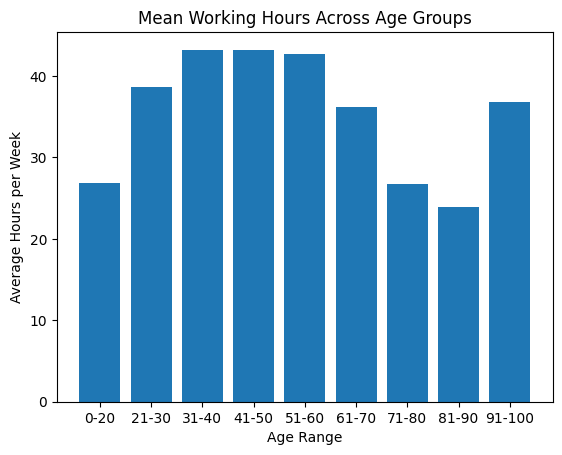

In [28]:
bins = [0, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['0-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']
data['age_range'] = pd.cut(data['age'], bins = bins, labels = labels, right = False)
grouped_df = data.groupby('age_range')['hours.per.week'].mean().reset_index()
plt.bar(grouped_df['age_range'], grouped_df['hours.per.week'])
plt.xlabel('Age Range')
plt.ylabel('Average Hours per Week')
plt.title('Mean Working Hours Across Age Groups')

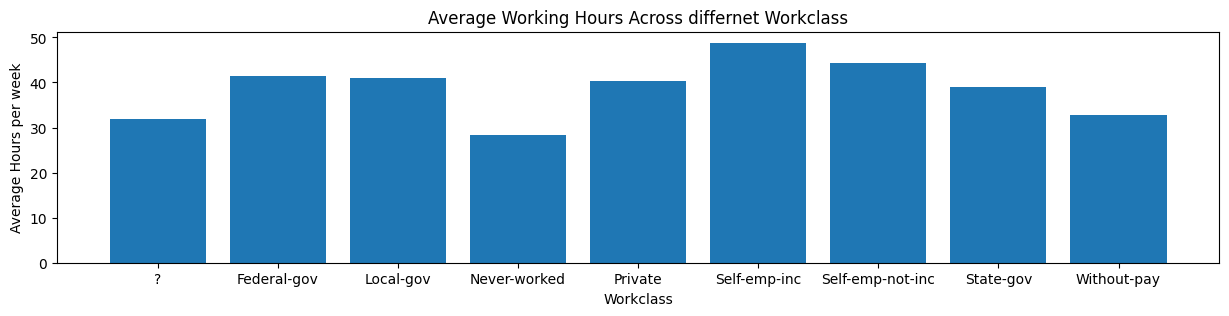

In [29]:
fig = plt.figure(figsize =(15, 3))
grouped_df = data.groupby('workclass')['hours.per.week'].mean().reset_index()
plt.bar(grouped_df['workclass'], grouped_df['hours.per.week'])
plt.xlabel('Workclass')
plt.ylabel('Average Hours per week')
plt.title('Average Working Hours Across differnet Workclass')
plt.show()